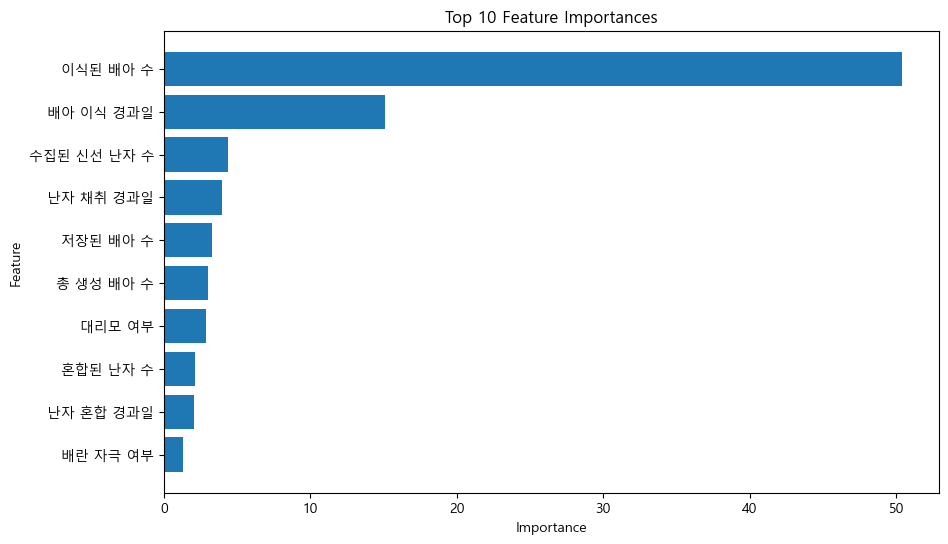

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 로드
train = pd.read_csv('C:/Aimers6/train.csv').drop(columns=['ID'])
test = pd.read_csv('C:/Aimers6/test.csv').drop(columns=['ID'])

# 데이터 분할
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

# 문자열 데이터를 숫자로 변환
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')

X = X.fillna(-1)
test = test.fillna(-1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 한글 폰트 적용 (VS코드 환경)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# 모델 학습 및 변수 중요도 분석
cat_model = CatBoostClassifier(iterations=500, verbose=0)
cat_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': cat_model.get_feature_importance()})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances['importance'][:10])), feature_importances['importance'][:10], align='center')
plt.yticks(range(len(feature_importances['feature'][:10])), feature_importances['feature'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(False)
plt.show()
